In [1]:
# ⚕️ Heart Disease Predictor

## Problem Statement
# Goal: Predict whether a person is likely to have heart disease based on medical attributes.
# Type: Supervised Learning (Binary Classification)
# Target: 'target' column (1 = disease, 0 = no disease)
# Importance: Early prediction helps doctors take preventive steps.

## Overview of Dataset
# Dataset: Heart Disease UCI Dataset (Cleveland Clinic)
# Total Rows: 303
# Total Columns: 14 (13 features + 1 target)

# Column Descriptions
# age      : Age of the patient
# sex      : Gender (1 = male, 0 = female)
# cp       : Chest Pain Type (0–3)
# trestbps : Resting Blood Pressure (in mm Hg)
# chol     : Serum Cholesterol (in mg/dl)
# fbs      : Fasting Blood Sugar > 120 mg/dl (1 = true, 0 = false)
# restecg  : Resting ECG Results (0–2)
# thalach  : Maximum Heart Rate Achieved
# exang    : Exercise Induced Angina (1 = yes, 0 = no)
# oldpeak  : ST Depression Induced by Exercise
# slope    : Slope of Peak Exercise ST Segment (0–2)
# ca       : Number of Major Vessels (0–4)
# thal     : Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)
# target   : 1 = heart disease present, 0 = no disease

In [2]:
#Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle


In [3]:
#Get the data
data = pd.read_csv("../project_8_data/heart_disease_data.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#Get the basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#Get the columns of the data
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
#Rename the columns of the data
data.rename(columns = {
    'age': 'Age',
    'sex': 'Gender',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingBS',
    'restecg': 'RestingECG',
    'thalach': 'MaxHR',
    'exang': 'ExerciseAngina',
    'oldpeak': 'ST_Depression',
    'slope': 'ST_Slope',
    'ca': 'MajorVessels',
    'thal': 'Thalassemia',
    'target': 'HeartDisease'
}, inplace = True)

In [7]:
#Clean the data
#Get the number of missing values in each column of the data
data.isnull().sum()

Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
ST_Depression     0
ST_Slope          0
MajorVessels      0
Thalassemia       0
HeartDisease      0
dtype: int64

In [8]:
#Uniquify the data
#Get the number of duplicate rows of the data
numberOfDuplicateRowsOfData = data.duplicated().sum()
numberOfDuplicateRowsOfData

np.int64(1)

In [9]:
#Get the duplicate row of the data
duplicateRowOfData = data[data.duplicated()]
duplicateRowOfData

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia,HeartDisease
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
#Get the original, and duplicate row of the data
originalAndDuplicateRowOfData = data[data.duplicated(keep = False)]
originalAndDuplicateRowOfData

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Depression,ST_Slope,MajorVessels,Thalassemia,HeartDisease
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
#Remove the duplicate row of the data
data = data.drop_duplicates()

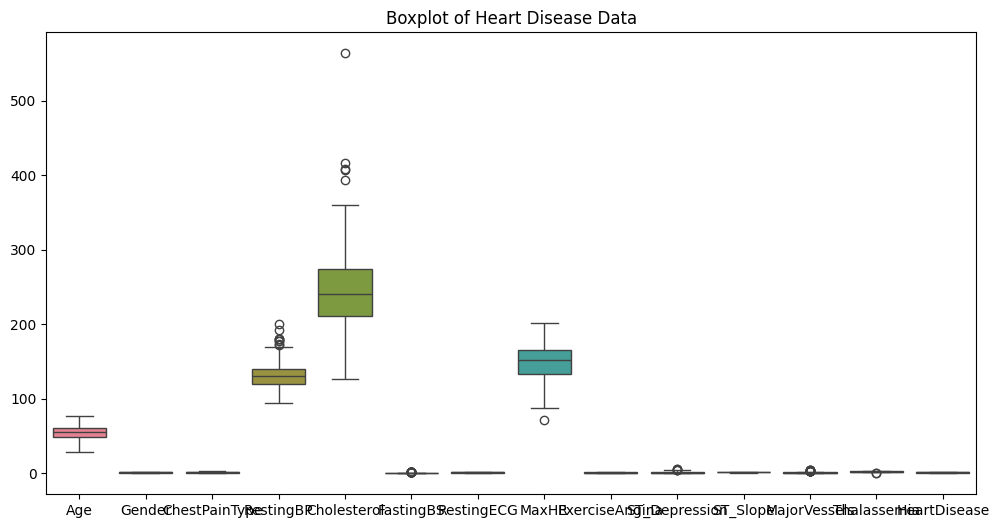

In [12]:
#Get the boxplot of the data
plt.figure(figsize = (12, 6))
sns.boxplot(data = data)
plt.title("Boxplot of Heart Disease Data")
plt.show()

In [13]:
#Removing the outliers from the data
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound,
                            np.where(data[column] > upper_bound, upper_bound, data[column]))
remove_outliers(data, 'RestingBP')
remove_outliers(data, 'Cholesterol')
remove_outliers(data, 'MaxHR')

C:\Users\arshs\AppData\Local\Temp\ipykernel_6984\1357303281.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < lower_bound, lower_bound,
C:\Users\arshs\AppData\Local\Temp\ipykernel_6984\1357303281.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < lower_bound, lower_bound,
C:\Users\arshs\AppData\Local\Temp\ipykernel_6984\1357303281.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


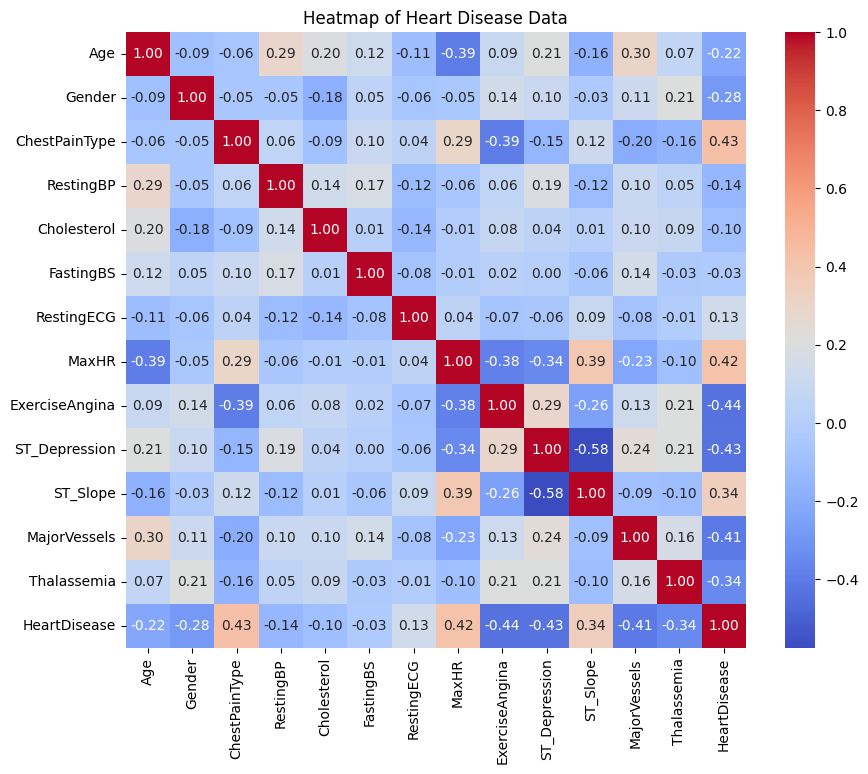

In [14]:
#Get the heatmap of the data
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot = True, fmt = ".2f", cmap = "coolwarm")
plt.title("Heatmap of Heart Disease Data")
plt.show()

In [15]:
#Preprocess the data
#Separate the features and target variable
X = data.drop('HeartDisease', axis = 1)
Y = data['HeartDisease']

In [16]:
#Create categorical and numerical features
categorical_features = ['Gender', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'MajorVessels', 'Thalassemia']
numerical_features = ['Age',  'RestingBP', 'Cholesterol', 'MaxHR', 'ST_Depression']

In [17]:
#Encode categorical features
X_encoded = pd.get_dummies(data, columns = categorical_features, drop_first = True)

In [18]:
#Scale numerical features
scaler = StandardScaler()
X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])

In [19]:
#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size = 0.2, random_state = 42, stratify = Y)

In [20]:
#Train and evaluate the models
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(Y_test, Y_pred_log_reg)
cm_log_reg = confusion_matrix(Y_test, Y_pred_log_reg)

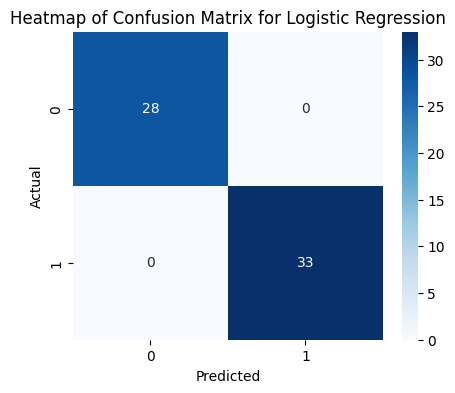

In [21]:
#Get the heatmap of the confusion matrix for Logistic Regression
plt.figure(figsize = (5, 4))
sns.heatmap(cm_log_reg, annot = True, fmt = "d", cmap = "Blues")
plt.title("Heatmap of Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
#Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, Y_train)
Y_pred_rf_clf = rf_clf.predict(X_test)
accuracy_rf_clf = accuracy_score(Y_test, Y_pred_rf_clf)
cm_rf_clf = confusion_matrix(Y_test, Y_pred_rf_clf)

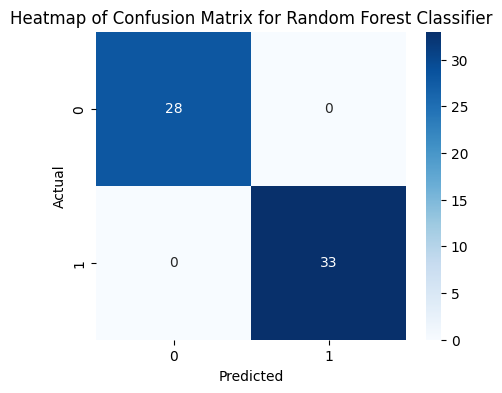

In [23]:
#Get the heatmap of the confusion matrix for Random Forest Classifier
plt.figure(figsize = (5, 4))
sns.heatmap(cm_rf_clf, annot = True, fmt = "d", cmap = "Blues")
plt.title("Heatmap of Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
#Compare the models
results = pd.DataFrame({
    'Model': ["LogisticRegression", "RandomForestClassifier"],
    'Accuracy': [accuracy_log_reg, accuracy_rf_clf]
})

C:\Users\arshs\AppData\Local\Temp\ipykernel_6984\3698335202.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Model', y = 'Accuracy', data = results, palette = "coolwarm")


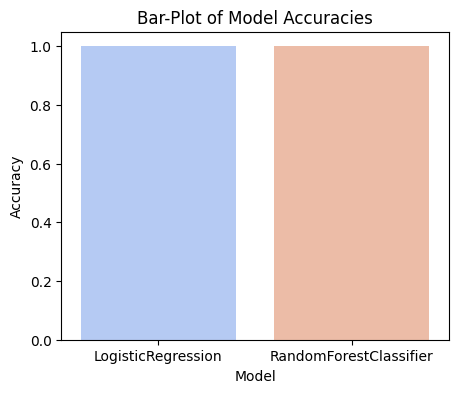

In [25]:
#Get the bar-plot of the model accuracies
plt.figure(figsize = (5, 4))
sns.barplot(x = 'Model', y = 'Accuracy', data = results, palette = "coolwarm")
plt.title("Bar-Plot of Model Accuracies")
plt.show()

In [26]:
#Save the model
with open('../project_8_model/heart_disease_rf_model.pkl', 'wb') as file:
    pickle.dump((rf_clf, scaler), file)